# Solow-model

In this project we are working with the Solow-model with human capital.
The parameters in the model are as follow:
1. $K_t$ is capital
* $H_t$ is human capital
* $L_t$ is labor
* $A_t$ is technology
* $Y_t$ is GDP


$Y_t=K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha-\varphi}$

$K_{t-1}-K_t=s_KY_t-\delta K_t$

$H_{t-1}-H_t=s_HY_t-\delta H_t$


$s_K = \frac{Y_t}{I_t^{K}}$,
$s_H = \frac{Y_t}{I_t^{H}}$


$\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$, $\tilde{h}_t = \frac{H_t}{A_{t}L_{t}}$

$\tilde{y}_t = \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}$


Transitions equations:

$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}+(1-\delta)\tilde{k}_t)$

$\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}+(1-\delta)\tilde{h}_t)$

Solow equations:

$\tilde{k}_{t+1}-\tilde{k}_{t}=\frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}-(n+g+\delta+ng)\tilde{k}_{t})$

$\tilde{h}_{t+1}-\tilde{h}_{t}=\frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}-(n+g+\delta+ng)\tilde{h}_{t})$

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import optimize


def solow_equation(k,h,alpha,phi,delta,sK,sH,n,g):
    """ calculate capital and human capital in the next-period
        
    Args:
    
        k (float): capital in this period
        h (float): human capital in this period
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
    
    Returns:
    
        k_plus (float): capital in next period
        h_plus (float): human capital in next period
        
    """
    
    k_plus = (1/(1+n)*(1+g)) *(sK * k**(alpha) * h**(phi) + (1-delta)*k)    
    h_plus = (1/(1+n)*(1+g)) *(sH * k**(alpha) * h**(phi) + (1-delta)*h)
    
    return k_plus, h_plus
   


In [103]:
solow_equation(8,8,0.3,0.3,0.95,0.5,0.5,500,1000)

(4.277928598241199, 4.277928598241199)

In [104]:
def simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T):
    """ simulate the solow model
        
    Args:
    
        k0 (float): initial level of kapital
        h (float): initial level of human kapital
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
        T (int): number of periods to simulate
    
    Returns:
    
        k_path (list): capital path (length T)
        h_path (list): human capital path (length T)
        
    """
    
    # a. initialize
    k_path = [k0]
    h_path = [h0]
   
    
    # b. simulate forward
    for t in range(1,T):
        
        # i. apply solow equation
        k_plus = solow_equation(k_path[t-1],h_path[t-1],alpha,phi,delta,sK,sH,n,g)[0]  
        h_plus = solow_equation(k_path[t-1],h_path[t-1],alpha,phi,delta,sK,sH,n,g)[1] 
        
        # ii. save result
        k_path.append(k_plus)
        h_path.append(h_plus)
        
    return k_path, h_path


In [105]:
simulate_solow_model(0.3,0.5,0.3,0.3,0.05,0.15,0.13,0.05,0,10)

([0.3,
  0.3522877523410084,
  0.4047144441450239,
  0.45705558438359467,
  0.5091436705092961,
  0.5608498315099577,
  0.6120721867309576,
  0.6627283034203473,
  0.7127502171530581,
  0.762081085425558],
 [0.5,
  0.522458909171731,
  0.5472151032930342,
  0.5738667024489372,
  0.6020809616007525,
  0.6315764807702755,
  0.6621114146480014,
  0.6934753964631387,
  0.7254838296189005,
  0.7579737273833608])

In [106]:
style = {'description_width': "initial"}

def simulation(k0=0.1,h0=0.1,alpha=0.3,phi=0.3,delta=0.05,sK=0.15,sH=0.14,n=0.05,g=0,T=200):
    k_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[0]
    h_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[1]
    
    """ simulate the solow model
        
    Args:
    
        k0 (float): initial level of kapital
        h (float): initial level of human kapital
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
        T (int): number of periods to simulate
    
    Returns:
    
        k_path (list): capital path (length T)
        h_path (list): human capital path (length T)
        
    """
    
    
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_path[:T],'r--',label="Capital")
    ax.plot(h_path[:T],label="Human capital")
    plt.legend()
    plt.title("Steady State for capital and human capital")

import ipywidgets as widgets
widgets.interact(simulation,
    k0=widgets.FloatSlider(description=r"\(k_0\)", min=0, max=5, step=0.2, value=1, style=style),
    h0=widgets.FloatSlider(description=r"\(h_0\)", min=0, max=5, step=0.2, value=0.5, style=style),
    alpha=widgets.FloatSlider(description=r"\(\alpha\)", min=0, max=1, step=0.01, value=0.3,style=style),
    phi=widgets.FloatSlider(description=r"\(\varphi\)", min=0, max=1, step=0.01, value=0.3,style=style),
    delta=widgets.FloatSlider(description=r"\(\delta\)", min=0, max=1, step=0.01, value=0.05,style=style),
    sK=widgets.FloatSlider(description="sK", min=0, max=1, step=0.01, value=0.15, style=style),
    sH=widgets.FloatSlider(description="sH", min=0, max=1, step=0.01, value=0.15, style=style),
    n=widgets.FloatSlider(description=r"\(n\)", min=0, max=1, step=0.01, value=0.05, style=style),
    g=widgets.FloatSlider(description=r"\(g\)", min=0, max=1, step=0.01, value=0, style=style),
    T=widgets.IntSlider(description=r"\(T\)", min=1, max=500, step=5, value=150, style=style)
    );


interactive(children=(FloatSlider(value=1.0, description='\\(k_0\\)', max=5.0, step=0.2, style=SliderStyle(des…

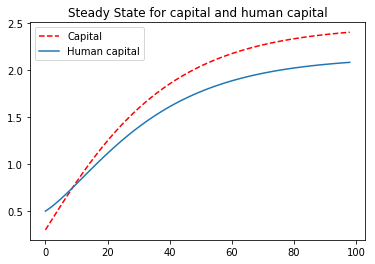

In [107]:
k0 =0.3
h0 =0.5
alpha = 0.3
phi = 0.3
delta = 0.05
sK = 0.15
sH = 0.13
n = 0.05
g = 0
T = 99

k_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[0]
h_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[1]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(k_path[:T],'r--',label="Capital")
ax.plot(h_path[:T], label="Human capital")
plt.legend()
plt.title("Steady State for capital and human capital")
plt.show()

In [108]:
def solver(variables) :
    (k,h) = variables

    """ Solve for the optimal values in the Solow equations
        
    Args:
    
        variables (list): The list of the unknown values in the equations
    
    Returns:
    
       first_eq, second_eq (list): The values of the two equations equal to 0
     
        
    """
    
    first_eq = (1/(1+n)*(1+g)) *(sK * k**(alpha) * h**(phi) - (n+g+delta+n*g)*k)   
    second_eq = (1/(1+n)*(1+g)) *(sH * k**(alpha) * h**(phi) - (n+g+delta+n*g)*h)
    return [first_eq, second_eq]

solution = opt.fsolve(solver, (10,10))
print(solution)



[2.47523945 2.14520752]
